** GPU 사용

# 노드 8. 모델 학습 기술

IMDB 영화 리뷰 데이터 불러오기

In [ ]:
from keras.datasets import imdb
import numpy as np

# IMDB 데이터셋 로드 (단어 인덱스 상위 10,000개만 포함)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 첫 번째 리뷰 샘플 출력 (정수 인덱스 리스트)
# : 인덱스는 imdb.get_word_index()로 매핑된 단어 사전 기준
print(train_data[0])
# 첫 번째 리뷰 레이블 출력 (0 = 부정, 1 = 긍정)
print(train_labels[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


IMDB 데이터셋의 단어 인덱스 사전 로드
- 단어 → 정수 인덱스로 매핑된 딕셔너리 가져오기
- 단어(key)와 인덱스(value)의 매핑
- 단, 이 인덱스는 특수 토큰의 공간을 비워둔 상태


In [ ]:
# IMDB 데이터셋의 단어 인덱스 사전 로드
word_index = imdb.get_word_index()  # 단어 → 정수 인덱스로 매핑된 딕셔너리

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 단어 인덱스 사전 (word → index)을 반대로 뒤집기 (index → word)
# : 숫자 시퀀스를 실제 단어로 디코딩
index_word = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
# IMDB 데이터셋에서의 1번 인덱스 단어 확인
index_word[1]

'the'

In [ ]:
# 단어 인덱스 사전에서 25번째 단어 추출
# : 0-based index → 24번째가 25번째 단어
word_25th = list(word_index.keys())[24]
print(word_25th)

# 해당 단어에 매핑된 인덱스 값 출력
print(word_index[word_25th])

spider'
52016


In [ ]:
# 첫 번째 리뷰의 정수 시퀀스를 문자열로 변환 후 공백 기준으로 연결
# : train_data[0]은 단어 인덱스로 구성된 리스트
# : 각 인덱스를 문자열로 변환한 뒤, 하나의 문자열로 병합
review = ' '.join([str(i) for i in train_data[0]])
review

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [ ]:
# 정수 시퀀스를 실제 단어로 디코딩한 문자열로 변환
# : train_data[0]에 포함된 정수 인덱스 리스트를 index_word를 이용해 단어로 변환
# : Keras는 내부적으로 단어 인덱스를 +3 시프트해서 사용하기 때문에 조정 필요
#   - imdb.get_word_index()로 얻은 인덱스는 보정 전이기 때문에
#   - train_data에 저장된 인덱스를 -3 해줘야 원래 단어와 정확히 매칭
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

index_word에 없는 인덱스는 ?로 대체됨

IMDB 리뷰 데이터를 원-핫 인코딩 방식으로 벡터화하는 함수
- 정수 시퀀스인 각 리뷰를 10,000차원 이진 벡터로 변환
- 벡터에서 인덱스 i가 1이면, 해당 리뷰에 단어 인덱스 i가 포함되어 있음을 의미
- 결과적으로 각 리뷰는 단어 집합의 존재 여부를 나타내는 벡터로 표현됨

사용 목적
- 고정된 길이의 입력을 만들기 위해 자주 사용
- 간단한 모델(DNN, 로지스틱 회귀 등)에 사용하기 적합
- but. 단어 순서 정보는 완전히 손실됨 → 순서가 중요한 모델에는 부적합

In [ ]:
# imdb 데이터의 num_words를 10000으로 설정했으므로 dim도 10000으로 맞춤
def one_hot_encoding(data, dim=10000):
  # 0으로 초기화된 (리뷰 수, 단어 집합 크기) 형태의 행렬 생성
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.  # 해당 리뷰 d의 인덱스들 위치에 1을 채움
  return results

# 학습/테스트 데이터를 원-핫 벡터로 변환
x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

# 첫 번째 리뷰의 벡터 출력
print(x_train[0])  # 길이: 10000

[0. 1. 1. ... 0. 0. 0.]


해석 방향
- `x_train[0]`은 `train_data[0]`에 포함된 단어 인덱스를 기준으로 1이 채워진 1D 벡터  
    e.g., train_data[0] = [1, 14, 22, ...] 라면  
    -> x_train[0][1], x_train[0][14], x_train[0][22]는 1이 됨

<br>

In [ ]:
# IMDB 감정 분류 데이터셋(학습/테스트)의 첫 번째 라벨 확인
print(train_labels[0])
print(test_labels[0])

1
0


IMDB 데이터셋의 라벨(train_labels, test_labels)
- 리스트 형태를 NumPy 배열로 변환
- 데이터 타입을 float32로 명시적으로 지정
    - Keras 모델은 입력과 출력 모두 보통 float32 타입을 기대함

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


<br>

IMDB 감정 분류 문제를 위한 기본적인 완전 연결 신경망(DNN) 구성
- 입력은 원-핫 인코딩된 벡터(10,000차원)
- 출력은 이진 분류(긍정/부정)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()

# 입력층 + 첫 번째 은닉층: 노드 16개, ReLU 활성화 함수
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input'))
# 두 번째 은닉층: 노드 16개, ReLU
model.add(layers.Dense(16, activation='relu', name='hidden'))
# 출력층: 노드 1개, sigmoid → 이진 분류 (0 또는 1 확률)
model.add(layers.Dense(1, activation='sigmoid', name='output'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<br>

컴파일: 모델을 학습할 준비 상태로

1. 옵티마이저: `'rmsprop'`
- 학습률을 자동 조정하며 빠르게 수렴
- 텍스트, 시계열 등에 자주 쓰임 (기본값 그대로 사용해도 성능 양호)

2. 손실 함수: `'binary_crossentropy'`
- 이진 분류 문제에서 확률과 정답 간의 오차를 계산
- 출력층에 sigmoid를 썼기 때문에 이 손실 함수를 써야 함

In [ ]:
model.compile(
    optimizer='rmsprop',         # RMSProp 최적화 알고리즘
    loss='binary_crossentropy',  # 이진 분류용 손실 함수
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

<br>

모델 학습
- 훈련 데이터로 20번(epoch) 반복하면서
- 각 epoch마다 검증 데이터로 성능 평가

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,       # 전체 데이터를 20번 반복 학습
                    batch_size=512,  # 매 epoch마다 데이터를 512개씩 나누어 학습
                    validation_data=(x_test, y_test))  # 검증용 데이터 제공

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.7090 - loss: 0.5979 - val_accuracy: 0.8657 - val_loss: 0.3794
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8953 - loss: 0.3137 - val_accuracy: 0.8787 - val_loss: 0.3080
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9195 - loss: 0.2289 - val_accuracy: 0.8846 - val_loss: 0.2881
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9320 - loss: 0.1883 - val_accuracy: 0.8872 - val_loss: 0.2815
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9474 - loss: 0.1586 - val_accuracy: 0.8818 - val_loss: 0.2976
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9517 - loss: 0.1435 - val_accuracy: 0.8801 - val_loss: 0.3075
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9574 - loss: 0.1288 - val_accuracy: 0.8771 - val_loss: 0.3241
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9633 - loss: 0.1119 - val_accuracy: 0.8758 - 

<br>

모델 학습 결과를 시각화
- 학습(train)과 검증(validation) 과정에서의 손실(Loss)과 정확도(Accuracy) 변화를 에포크(epoch)별로 각각 그래프로 나타냄


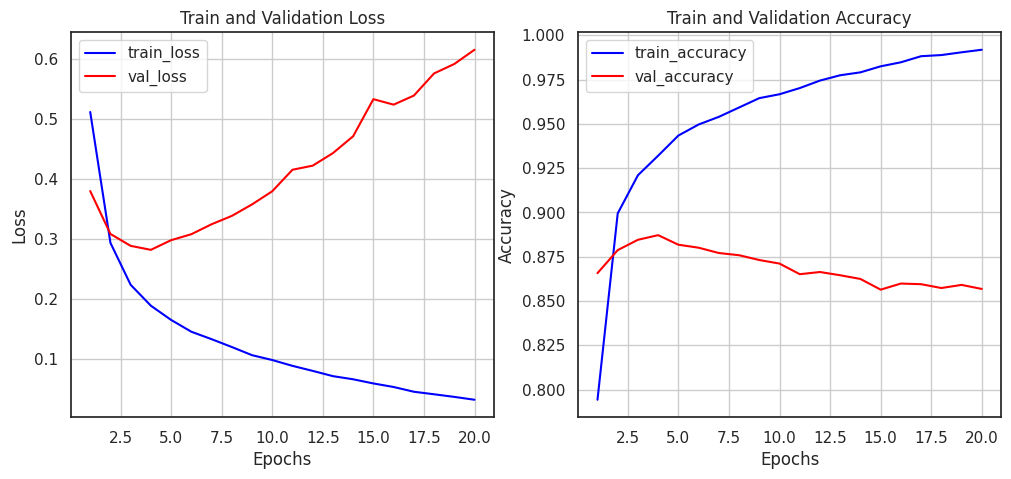

In [ ]:
import matplotlib.pyplot as plt

# 학습 과정의 손실과 정확도 정보 저장 (history 객체에서 추출)
history_dict = history.history

# 손실 값 (학습 손실, 검증 손실)
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)  # 에포크 범위 (1부터 시작)

fig = plt.figure(figsize=(12, 5))

# (1) 손실 그래프: 학습 vs 검증
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

# 정확도 값 (학습 정확도, 검증 정확도)
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# (2) 정확도 그래프: 학습 vs 검증
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()